In [142]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick

In [143]:
data = pd.read_csv("data.csv")

In [144]:
data["busi_date"] = pd.to_datetime(data["busi_date"])
data["industry"] = data["industry"].str.replace(" ","")
data["industry"] = data["industry"].str.lstrip("ind")
data["industry"] = data["industry"].str.zfill(2)
data["industry"] = "ind"+ data["industry"]

In [145]:
data = data.groupby(["busi_date","order_book_id"])["mktval","holding_days"].sum()
data = data.reset_index()
data["busi_date"] = data["busi_date"].dt.date
data

,busi_date,order_book_id,mktval,holding_days
0,2023-05-04,000001.XSHE,57285.00,20
1,2023-05-04,000002.XSHE,49335.00,64
2,2023-05-04,000009.XSHE,9486.00,2
3,2023-05-04,000012.XSHE,0.00,6
4,2023-05-04,000021.XSHE,8400.00,19
...,...,...,...,...
11170,2023-05-19,688772.XSHG,5454.68,87
11171,2023-05-19,688777.XSHG,9954.00,7
11172,2023-05-19,688779.XSHG,5136.00,23
11173,2023-05-19,688981.XSHG,48345.00,55


In [146]:
data = data[data.mktval == 0.0]
data

,busi_date,order_book_id,mktval,holding_days
3,2023-05-04,000012.XSHE,0.0,6
9,2023-05-04,000039.XSHE,0.0,9
23,2023-05-04,000333.XSHE,0.0,23
46,2023-05-04,000582.XSHE,0.0,11
64,2023-05-04,000703.XSHE,0.0,2
...,...,...,...,...
11043,2023-05-19,601808.XSHG,0.0,10
11046,2023-05-19,601828.XSHG,0.0,3
11049,2023-05-19,601865.XSHG,0.0,5
11060,2023-05-19,601916.XSHG,0.0,3


In [147]:
data = pd.DataFrame(data.groupby(["busi_date"])["holding_days"].mean())

In [148]:
data

,holding_days
busi_date,
2023-05-04,14.365854
2023-05-05,12.333333
2023-05-08,11.306122
2023-05-09,8.000000
2023-05-10,17.750000
2023-05-11,14.555556
2023-05-12,15.236842
2023-05-15,10.047619
2023-05-16,14.400000


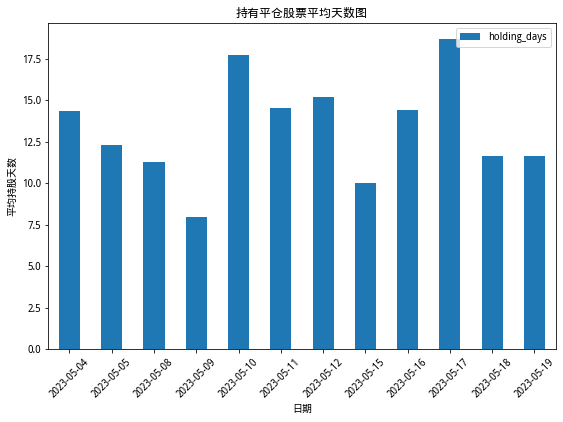

In [149]:
plt.figure(figsize=(20,6))
ax=plt.subplot(121)
data.plot.bar(ax=ax)
ax.set_xticklabels(data.index, rotation = 45)
ax.set(title="持有平仓股票平均天数图", xlabel='日期', ylabel='平均持股天数')
ax.legend(loc = "upper right", ncol = 6)
